In [1]:
# Imports
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# loading the output text file

with open('output.txt', 'r') as f:
    text = f.read()

In [ ]:
print(text)

**before removing punctuations**

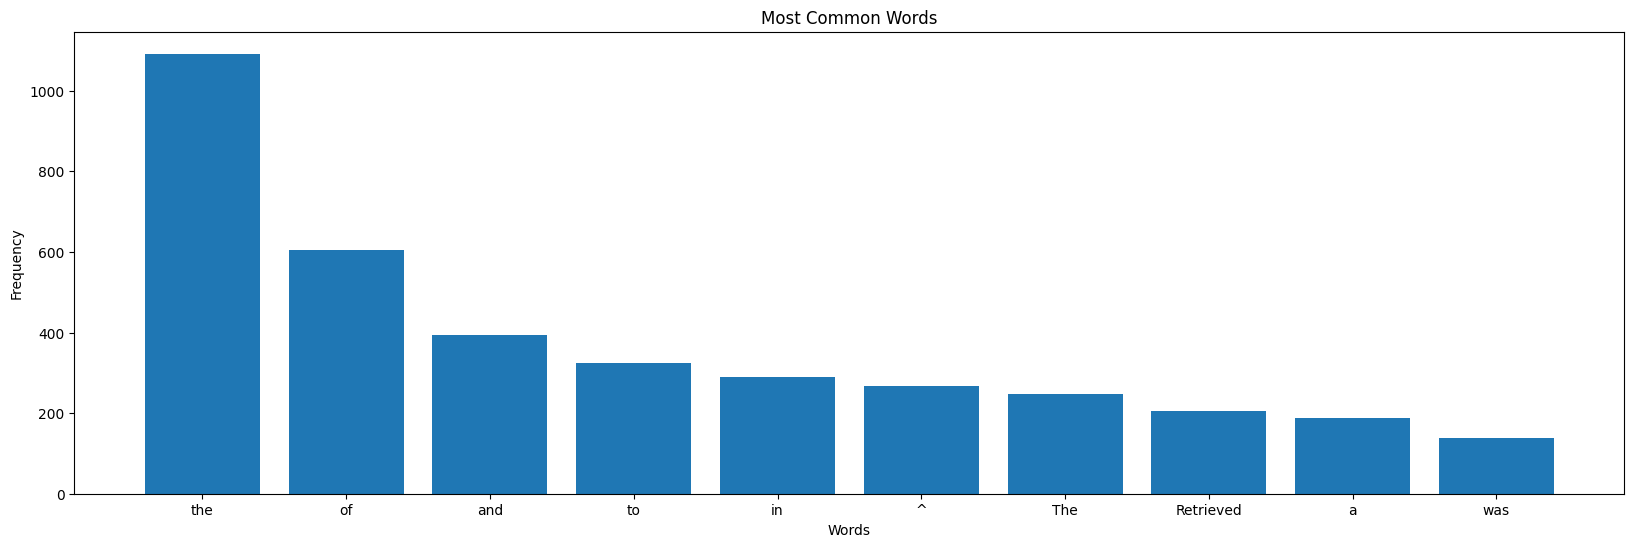

In [6]:
from collections import Counter
import matplotlib.pyplot as plt

# Tokenize the words.
words = text.split()
text_words= words
# Counting the frequency of each word.
word_counts = Counter(words)

# Getting the 10 most common words.
most_common_words = word_counts.most_common(10)

# Preparing the data for the bar chart.
words, counts = zip(*most_common_words)

# Creating the bar chart.
plt.figure(figsize=(20, 6))
plt.bar(words, counts)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Most Common Words")
plt.show()

In [7]:
# printing most common words with counts
print(most_common_words)

[('the', 1092), ('of', 604), ('and', 393), ('to', 325), ('in', 289), ('^', 268), ('The', 248), ('Retrieved', 206), ('a', 187), ('was', 138)]


In [15]:
# remove punctuations and space from array of words

import string

# Remove punctuation and space from words
words_without_punct = [word.translate(str.maketrans('', '', string.punctuation)) for word in text_words]
words_clean = [word.replace(" ", "") for word in words_without_punct]

print(words_clean)

words_clean_store=words_clean

['Key', 'events', 'of', 'the', '20th', 'century', '', 'Wikipedia', 'Jump', 'to', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'to', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Search', 'Search', 'Create', 'account', 'Log', 'in', 'Personal', 'tools', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'more', 'ContributionsTalk', 'Contents', 'move', 'to', 'sidebar', 'hide', 'Top', '1Events', 'in', 'the', '20th', 'century', 'Toggle', 'Events', 'in', 'the', '20th', 'century', 'subsection', '11The', 'world', 'at', 'the', 'beginning', 'of', 'the', 'century', '111The', 'war', 'to', 'end', 'all', 'wars', 'World', 'War', 'I', '1914–1918', '112The', 'Russian', 'Revolution', 'and', 'Communism', '12Between', 'the', 'wars', '121Economic', 'depression', '122The', 'rise', 'of', 'dictato

**Ploting 10 most common words after removing punctuations**

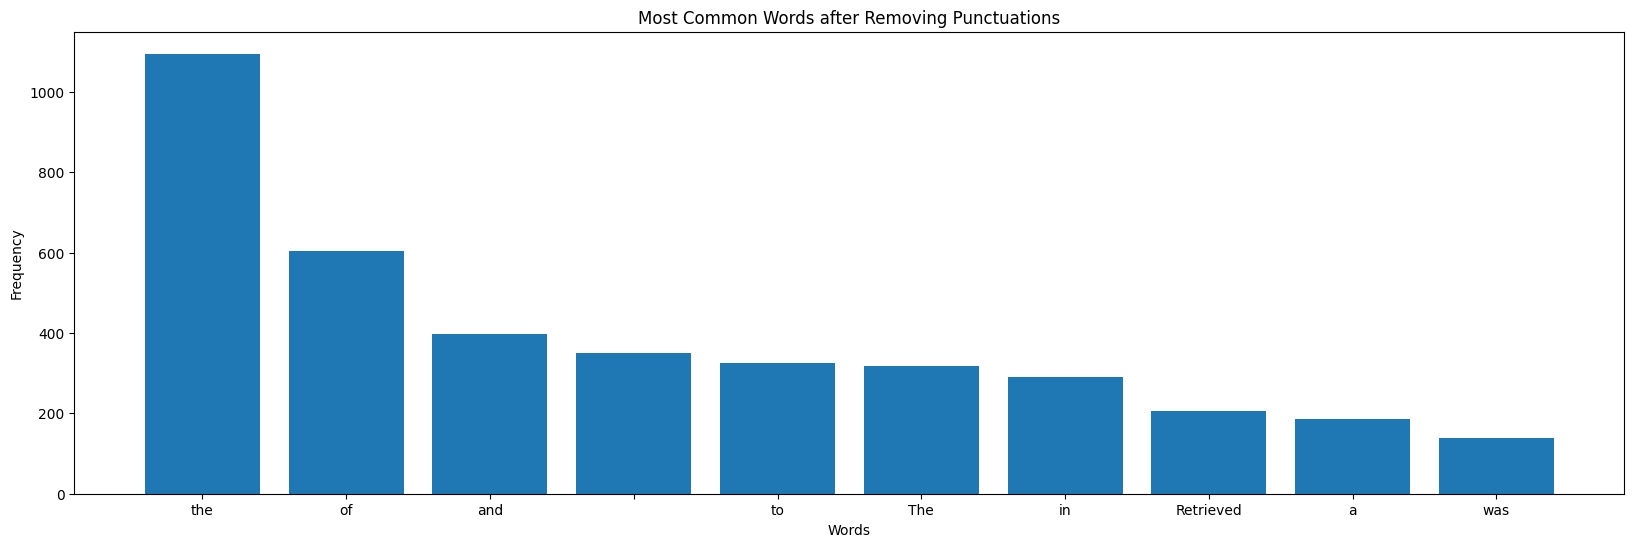

In [16]:
# Count the frequency of each word.
word_counts = Counter(words_clean)

# Get the 10 most common words.
most_common_words = word_counts.most_common(10)

# Prepare data for the bar chart.
words, counts = zip(*most_common_words)

# Create the bar chart.
plt.figure(figsize=(20, 6))
plt.bar(words, counts)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Most Common Words after Removing Punctuations")
plt.show()

In [20]:
#printing most common words with count after removing punctuations
print(most_common_words)

[('the', 1095), ('of', 604), ('and', 397), ('', 349), ('to', 325), ('The', 317), ('in', 291), ('Retrieved', 206), ('a', 187), ('was', 138)]


**creating text blob**

In [21]:
!pip install nltk
import nltk
nltk.download('punkt')
!python -m textblob.download_corpora

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [23]:
print(text_words)

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'Wikipedia', 'Jump', 'to', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'to', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Search', 'Search', 'Create', 'account', 'Log', 'in', 'Personal', 'tools', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'more', 'ContributionsTalk', 'Contents', 'move', 'to', 'sidebar', 'hide', '(Top)', '1Events', 'in', 'the', '20th', 'century', 'Toggle', 'Events', 'in', 'the', '20th', 'century', 'subsection', '1.1The', 'world', 'at', 'the', 'beginning', 'of', 'the', 'century', '1.1.1"The', 'war', 'to', 'end', 'all', 'wars":', 'World', 'War', 'I', '(1914–1918)', '1.1.2The', 'Russian', 'Revolution', 'and', 'Communism', '1.2Between', 'the', 'wars', '1.2.1Economic', 'depression', '1.2.2The', 'ris

In [25]:
# Create a tags list using TextBlob

from textblob import TextBlob

# Create a TextBlob object from the text.
blob = TextBlob(" ".join(text_words))

# Extract the tags from the TextBlob object.
tags = blob.tags

# Print the tags.
print(tags)


[('Key', 'JJ'), ('events', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('20th', 'JJ'), ('century', 'NN'), ('Wikipedia', 'NNP'), ('Jump', 'NNP'), ('to', 'TO'), ('content', 'VB'), ('Main', 'NNP'), ('menu', 'NN'), ('Main', 'NNP'), ('menu', 'NN'), ('move', 'NN'), ('to', 'TO'), ('sidebar', 'VB'), ('hide', 'JJ'), ('Navigation', 'NNP'), ('Main', 'NNP'), ('pageContentsCurrent', 'NN'), ('eventsRandom', 'NN'), ('articleAbout', 'IN'), ('WikipediaContact', 'NNP'), ('usDonate', 'JJ'), ('Contribute', 'NNP'), ('HelpLearn', 'NNP'), ('to', 'TO'), ('editCommunity', 'VB'), ('portalRecent', 'JJ'), ('changesUpload', 'NN'), ('file', 'NN'), ('Search', 'NNP'), ('Search', 'NNP'), ('Create', 'NNP'), ('account', 'NN'), ('Log', 'NNP'), ('in', 'IN'), ('Personal', 'NNP'), ('tools', 'NNS'), ('Create', 'NNP'), ('account', 'NN'), ('Log', 'NNP'), ('in', 'IN'), ('Pages', 'NNP'), ('for', 'IN'), ('logged', 'VBN'), ('out', 'RP'), ('editors', 'NNS'), ('learn', 'VBP'), ('more', 'JJR'), ('ContributionsTalk', 'JJ'), ('Contents', 'NNS

In [26]:
# Count the frequency of each POS tag.
pos_tag_counts = Counter([tag[1] for tag in tags])

# Get the 10 most common POS tags.
most_common_pos_tags = pos_tag_counts.most_common(10)

# Print the 10 most common POS tags.
print(most_common_pos_tags)

[('NNP', 3832), ('NN', 2146), ('IN', 1857), ('DT', 1782), ('JJ', 1579), ('CD', 1129), ('NNS', 819), ('VBD', 784), ('RB', 610), ('VBN', 512)]


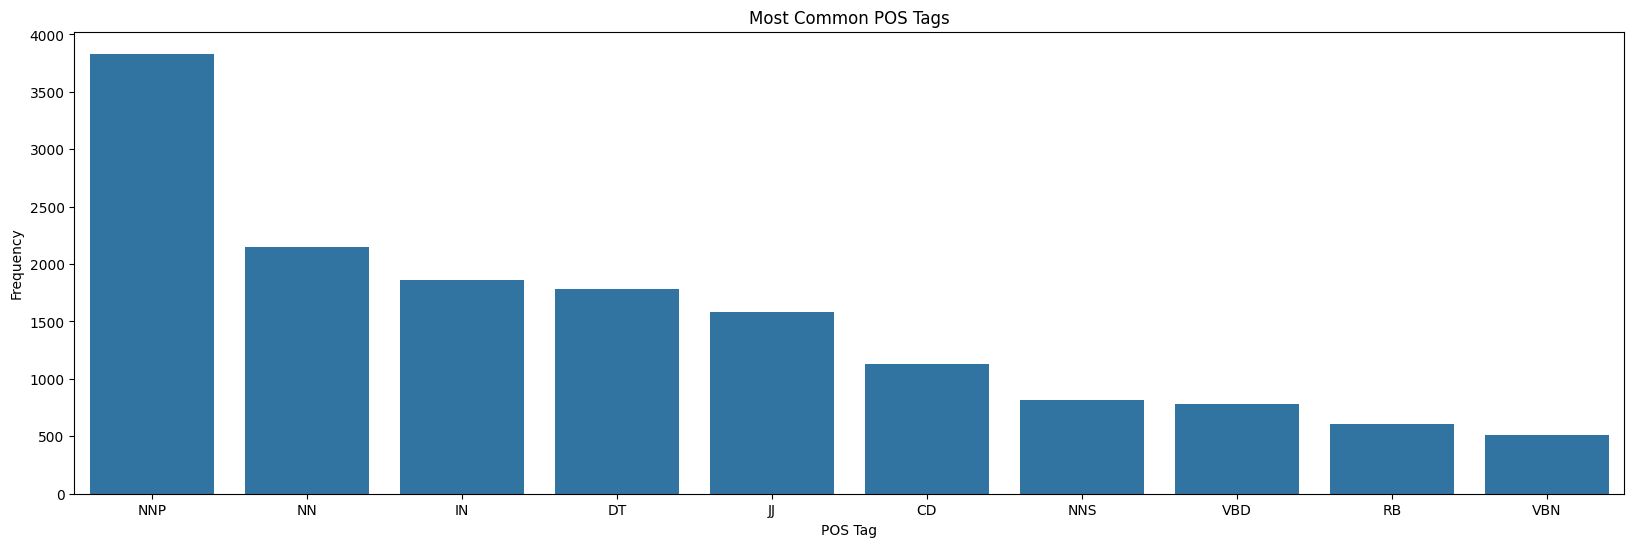

In [28]:
# Ploting this list in a bar chart using the seaborn library

import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart of the 10 most common POS tags.
plt.figure(figsize=(20, 6))
sns.barplot(x=[tag[0] for tag in most_common_pos_tags], y=[tag[1] for tag in most_common_pos_tags])
plt.xlabel("POS Tag")
plt.ylabel("Frequency")
plt.title("Most Common POS Tags")
plt.show()

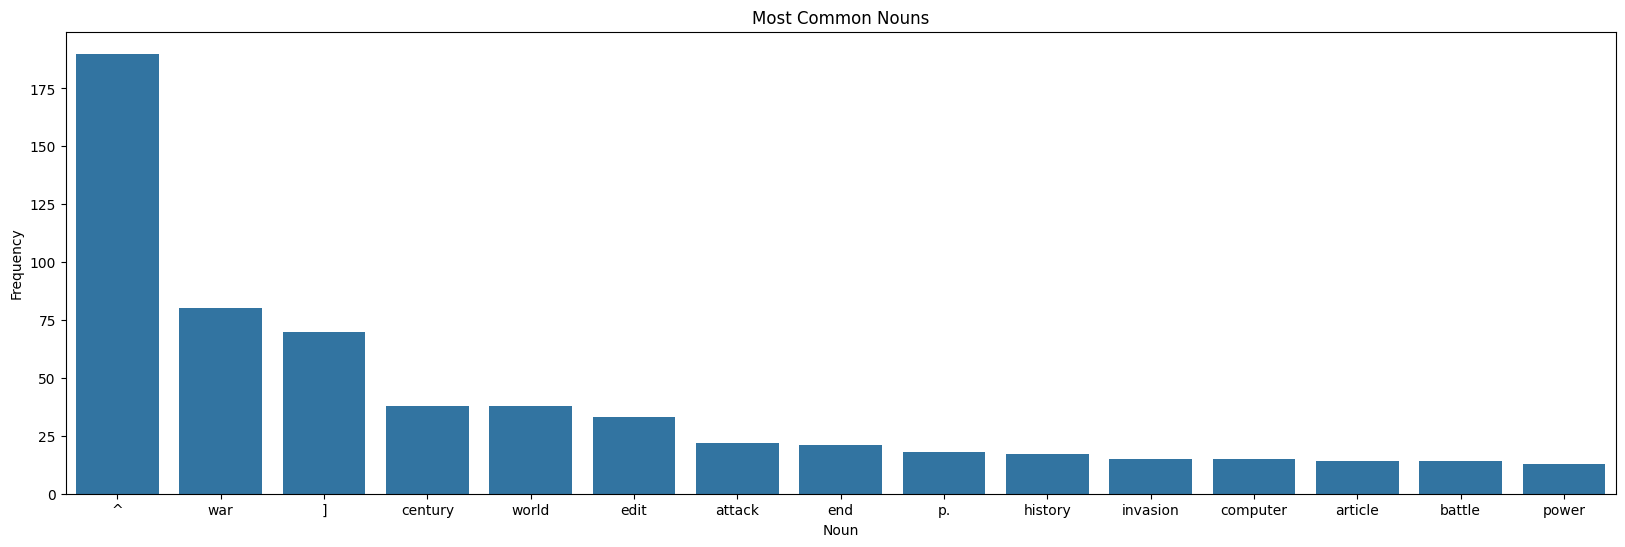

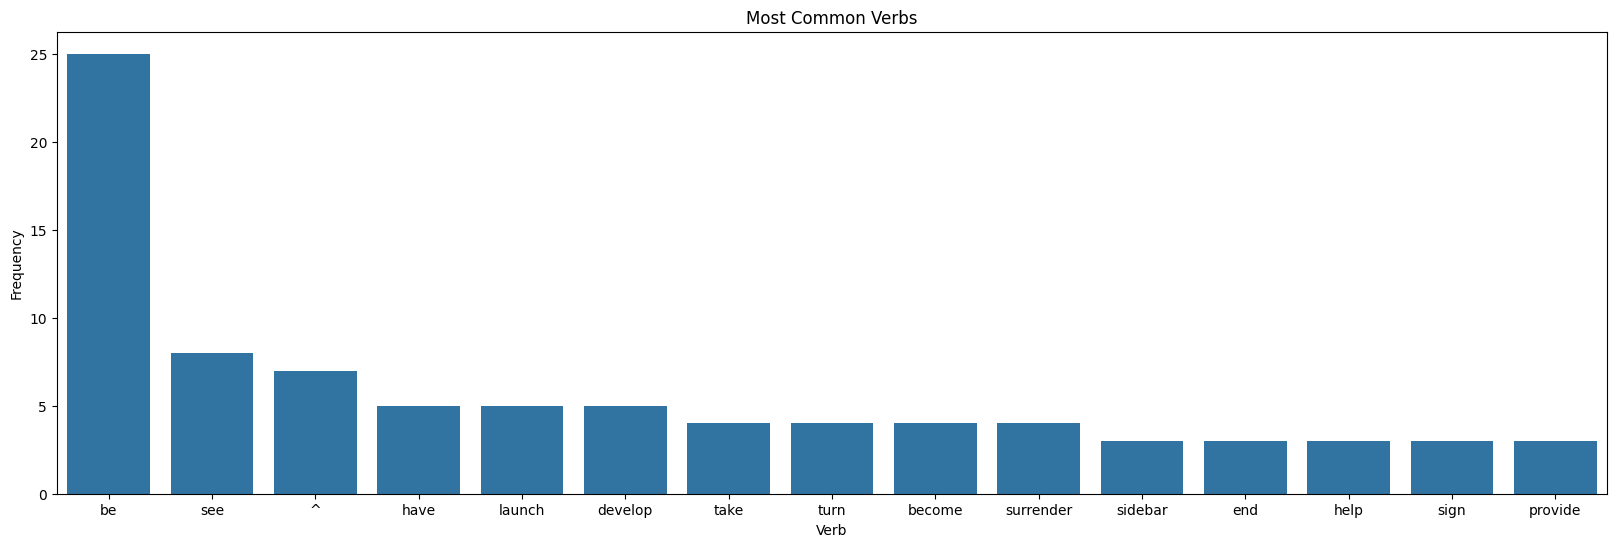

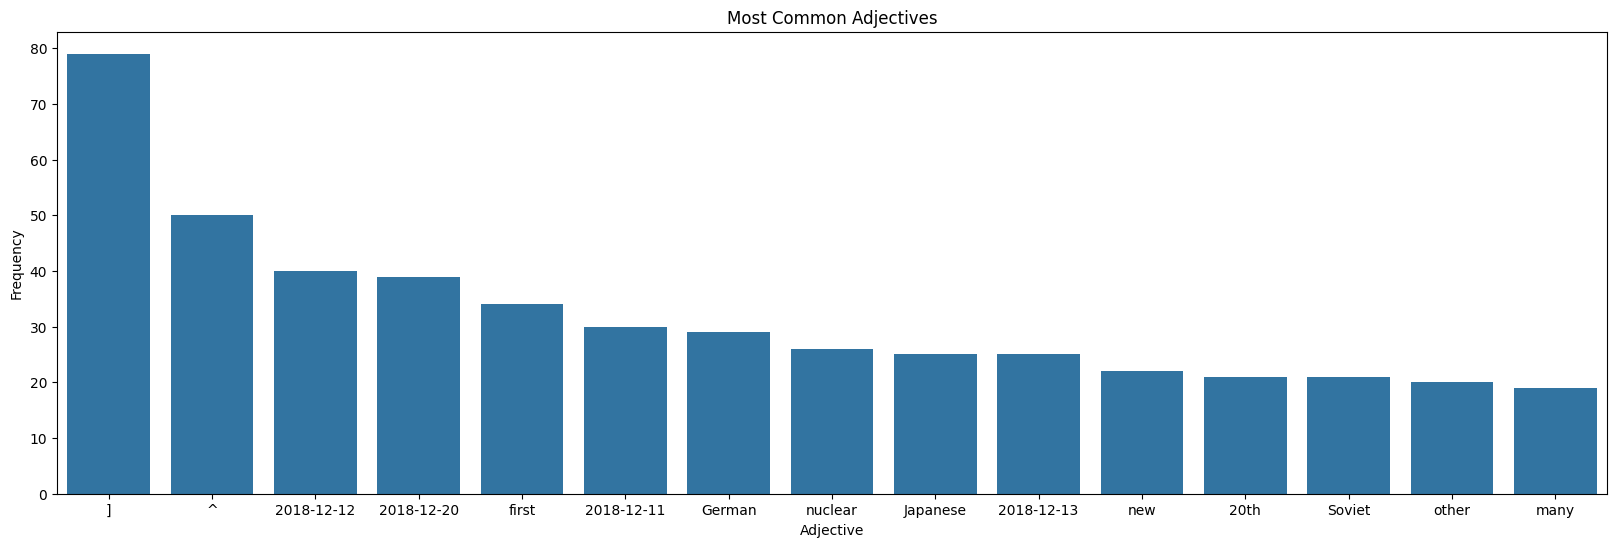

In [29]:
# Create three bar plots with the top 15 POS labels—one each for nouns, verbs, and adjectives for tags

import matplotlib.pyplot as plt
# Extract nouns, verbs, and adjectives from the tags.
nouns = [tag[0] for tag in tags if tag[1] == 'NN']
verbs = [tag[0] for tag in tags if tag[1] == 'VB']
adjectives = [tag[0] for tag in tags if tag[1] == 'JJ']

# Count the frequency of each noun, verb, and adjective.
noun_counts = Counter(nouns)
verb_counts = Counter(verbs)
adjective_counts = Counter(adjectives)

# Get the 15 most common nouns, verbs, and adjectives.
most_common_nouns = noun_counts.most_common(15)
most_common_verbs = verb_counts.most_common(15)
most_common_adjectives = adjective_counts.most_common(15)

# Create a bar chart of the 15 most common nouns.
plt.figure(figsize=(20, 6))
sns.barplot(x=[noun[0] for noun in most_common_nouns], y=[noun[1] for noun in most_common_nouns])
plt.xlabel("Noun")
plt.ylabel("Frequency")
plt.title("Most Common Nouns")
plt.show()

# Create a bar chart of the 15 most common verbs.
plt.figure(figsize=(20, 6))
sns.barplot(x=[verb[0] for verb in most_common_verbs], y=[verb[1] for verb in most_common_verbs])

plt.xlabel("Verb")
plt.ylabel("Frequency")
plt.title("Most Common Verbs")
plt.show()

# Create a bar chart of the 15 most common adjectives.
plt.figure(figsize=(20, 6))
sns.barplot(x=[adjective[0] for adjective in most_common_adjectives], y=[adjective[1] for adjective in most_common_adjectives])

plt.xlabel("Adjective")
plt.ylabel("Frequency")
plt.title("Most Common Adjectives")
plt.show()

**Create a dataframe with the countries and the number of times they’re mentioned in your text**


In [32]:
countries = [
    "Afghanistan",
    "Albania",
    "Algeria",
    "Andorra",
    "Angola",
    "Antigua and Barbuda",
    "Argentina",
    "Armenia",
    "Australia",
    "Austria",
    "Azerbaijan",
    "Bahamas",
    "Bahrain",
    "Bangladesh",
    "Barbados",
    "Belarus",
    "Belgium",
    "Belize",
    "Benin",
    "Bhutan",
    "Bolivia",
    "Bosnia and Herzegovina",
    "Botswana",
    "Brazil",
    "Brunei",
    "Bulgaria",
    "Burkina Faso",
    "Burundi",
    "Cabo Verde",
    "Cambodia",
    "Cameroon",
    "Canada",
    "Central African Republic",
    "Chad",
    "Chile",
    "China",
    "Colombia",
    "Comoros",
    "Congo",
    "Costa Rica",
    "Cote d'Ivoire",
    "Croatia",
    "Cuba",
    "Cyprus",
    "Czech Republic",
    "Democratic Republic of the Congo",
    "Denmark",
    "Djibouti",
    "Dominica",
    "Dominican Republic",
    "Ecuador",
    "Egypt",
    "El Salvador",
    "Equatorial Guinea",
    "Eritrea",
    "Estonia",
    "Eswatini",
    "Ethiopia",
    "Fiji",
    "Finland",
    "France",
    "Gabon",
    "Gambia",
    "Georgia",
    "Germany",
    "Ghana",
    "Greece",
    "Grenada",
    "Guatemala",
    "Guinea",
    "Guinea-Bissau",
    "Guyana",
    "Haiti",
    "Honduras",
    "Hungary",
    "Iceland",
    "India",
    "Indonesia",
    "Iran",
    "Iraq",
    "Ireland",
    "Israel",
    "Italy",
    "Jamaica",
    "Japan",
    "Jordan",
    "Kazakhstan",
    "Kenya",
    "Kiribati",
    "Kuwait",
    "Kyrgyzstan",
    "Laos" ]

In [33]:
# Create a dictionary of countries and their counts

words = words_clean_store
country_counts = {}
for word in words:
    if word in countries:  # Replace 'countries' with your list of country names.
        country_counts[word] = country_counts.get(word, 0) + 1

# Create a DataFrame from the dictionary.
country_counts_df = pd.DataFrame(country_counts.items(), columns=['Country', 'Count'])

# Print the DataFrame.
print(country_counts_df)

       Country  Count
0       France     13
1        Italy     13
2      Germany     37
3     Bulgaria      2
4      Austria      3
5      Estonia      2
6      Finland      4
7      Belgium      2
8      Denmark      3
9       Greece      3
10     Albania      2
11     Belarus      1
12       Egypt      2
13        Iraq      1
14       Japan     30
15     Algeria      1
16       China      8
17      Guinea      3
18       India      9
19      Israel      3
20        Iran      2
21  Bangladesh      2
22        Laos      1
23    Cambodia      2
24       Kenya      1
25       Ghana      1
26      Angola      1
27       Congo      1
28     Hungary      1
29        Cuba      2
30      Canada      1
31   Australia      1
32     Ireland      1


**Create a plot showing the frequency of the number of times these countries**


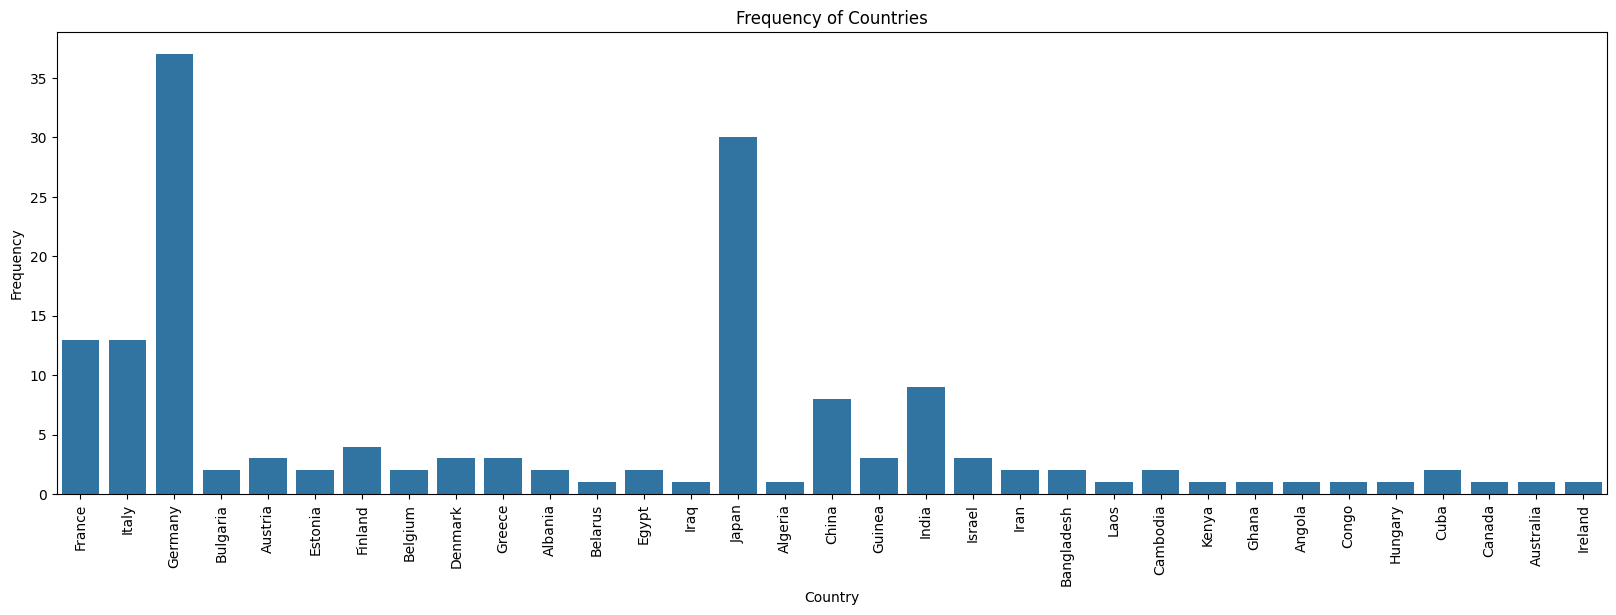

In [34]:
import matplotlib.pyplot as plt
# Create a bar chart of the countries.
plt.figure(figsize=(20, 6))
sns.barplot(x="Country", y="Count", data=country_counts_df)
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.title("Frequency of Countries")
plt.xticks(rotation=90)
plt.show()


Japan is the highest mentioned country in the text file and 2nd highest is Germany
